The purpose of this notebook is to generate a spatial distributionn of demographic types on a grid.

# Imports

In [134]:
import numpy as np
import random as rand
import matplotlib.pyplot as plt
from scipy.stats import gamma
from scipy.stats import multivariate_normal
import seaborn as sns; sns.set()

# Constants

In [48]:
GRD = 10  # what are the dimensions of the symmetrical grid containing the buurten
          # there will be GRD*GRD buurten as a result
RES = 10  # what is the resolution in pixels of each grid cell
NUM = 10  # how many higher level entities, wijken
CLU = 7   # how many demographic clusters or latent types do we want?

# Functional Requirements

## Requirements

These functions should collectively 
* return a grid, where each grid cell is assigned a particular cluster membership. 
* use all the cluster memberships available
* the grid cells should be correlated so that the same cluster occupies proximal cells
* visualize the grid


## Functions

In [228]:
# create a data structure which can store membership
# each demographic type bids for districts, sharing "responsibility"
def create_store():
    dt = np.dtype(('<f8', (CLU,)))
    sto = np.empty((GRD,GRD),dtype=dt)
    return sto
    
# find the centre of the demographic type
def get_centroid():
    x = rand.randrange(GRD)
    y = rand.randrange(GRD)
    centroid = (x,y)
    return (x,y)

# find the active area of the demographic type
def get_precision():
    rv = gamma.rvs(10)/2
    return rv

def get_layer():
    i, j = get_centroid()
    p = get_precision()
    x, y = np.mgrid[0:GRD:1, 0:GRD:1]
    pos = np.dstack((x, y))
    rv = multivariate_normal([i, j], [[p, 0.0], [0.0, p]])
    layer = rv.pdf(pos)
    w = sum(sum(layer))
    layer = layer/w
    return layer

def add_layers():
    L = np.empty((GRD,GRD,CLU))
    for i in range(CLU):
        l = get_layer()
        L[:,:,i]=l
    return L
        
def return_demo(L):
    demo = np.empty((GRD,GRD))
    for i in range(GRD):
        for j in range(GRD):
            H = L[i,j,:]
            n= np.argmax(H)
            demo[i,j]=n
    return demo

    


# Intended Use

(10, 12)


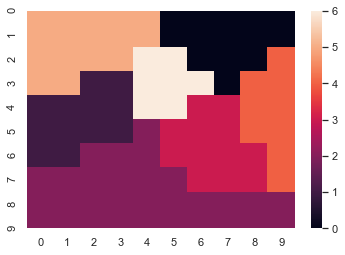

In [233]:
L = add_layers()
D = return_demo(L)
ax = sns.heatmap(D)